In [35]:
import os
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [36]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


Number of samples in 0 class is 1569



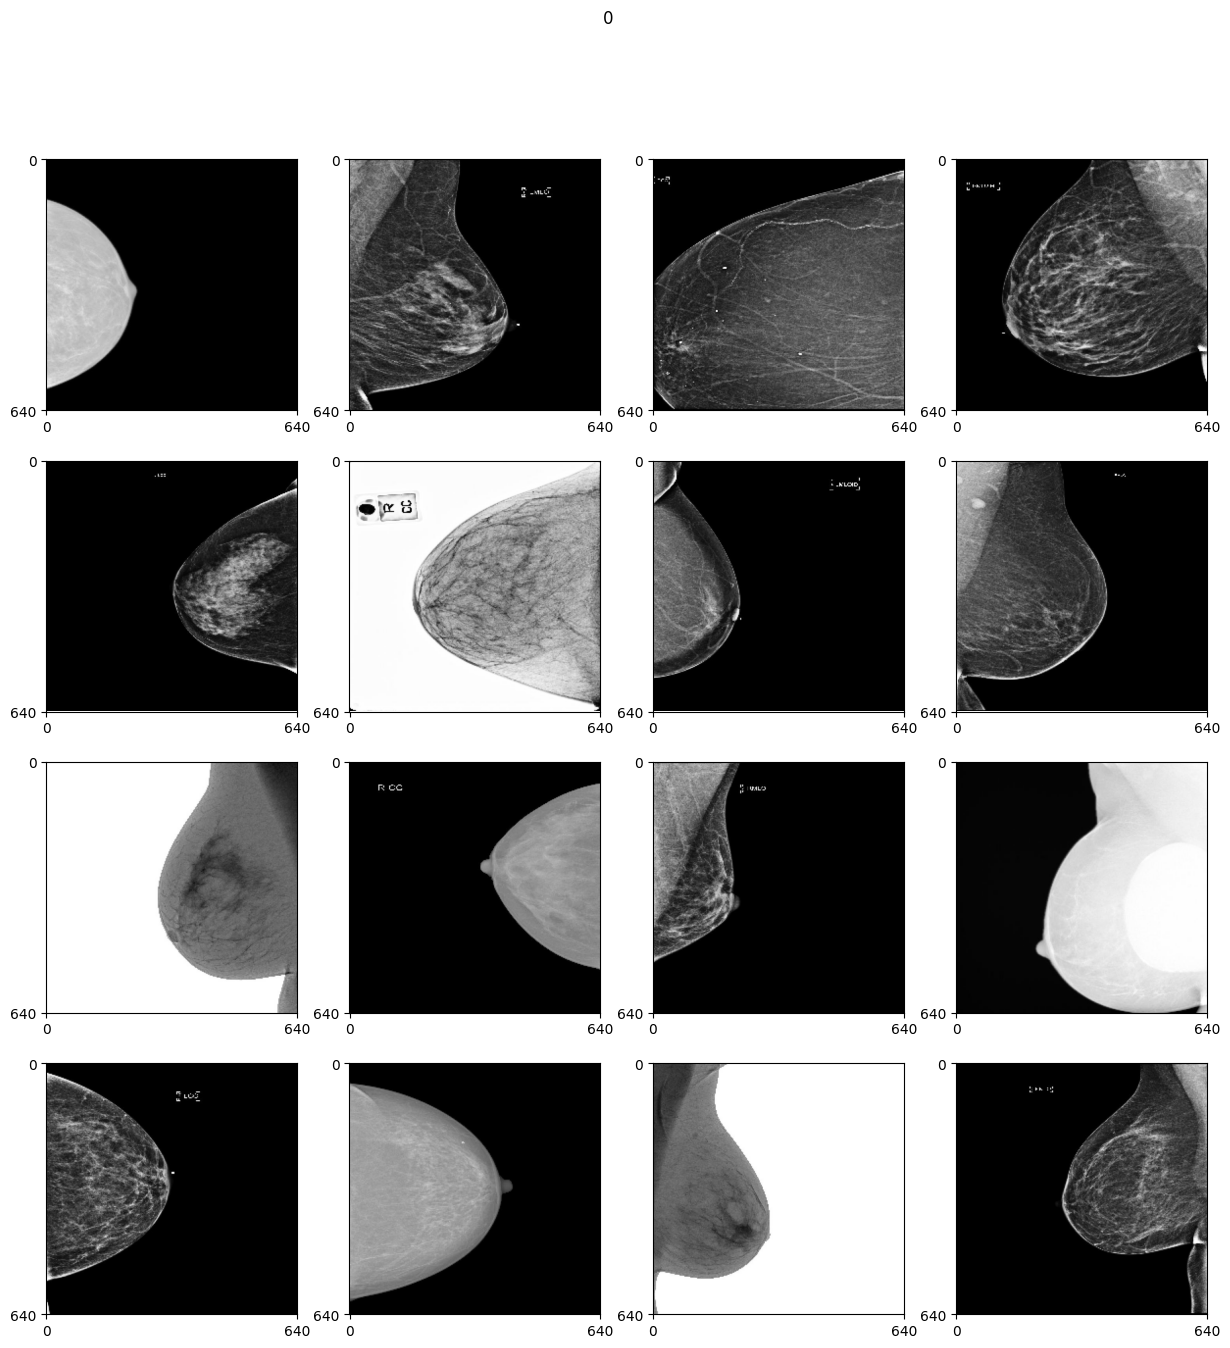



Number of samples in 1 class is 803



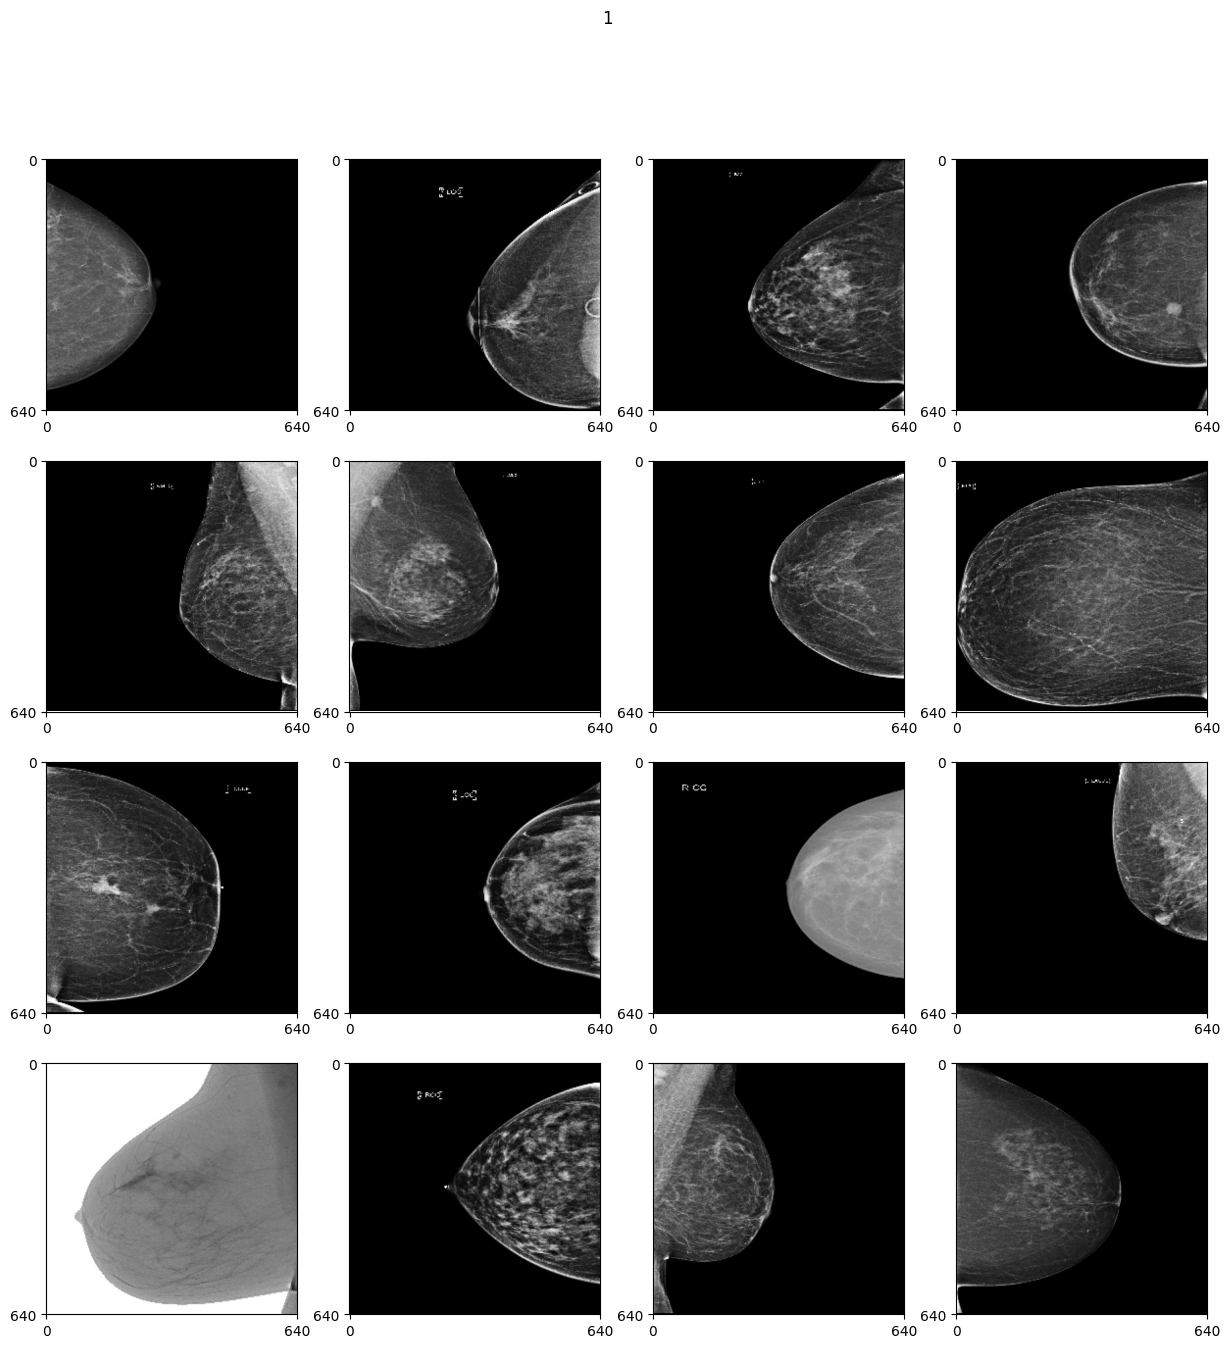

In [37]:
def display_images_in_folders(train_folders, train_path):
    for folder in train_folders:
        folder_path = os.path.join(train_path, folder)
        filenames = os.listdir(folder_path)

        print('Number of samples in {} class is {}\n'.format(folder, len(filenames)))

        fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

        for i in range(min(16, len(filenames))):
            plt.subplot(4, 4, i+1)
            filepath = os.path.join(folder_path, filenames[i])
            image = imread(filepath)
            plt.imshow(image)
            plt.xticks([0, image.shape[0]])
            plt.yticks([0, image.shape[1]])

        plt.suptitle(folder.capitalize())
        plt.show()
        print('\n')

train_folders = ['0', '1'] 
train_path = "/kaggle/input/breast-cancer-detection/train/" 
display_images_in_folders(train_folders, train_path)

In [38]:
IMAGE_DIR="/kaggle/input/breast-cancer-detection/"
IMAGE_SIZE=(64,64)
BATCH_SIZE=16
SEED_NUMBER=43

gen_args=dict(
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='binary',
    seed=SEED_NUMBER
)

data_gen=ImageDataGenerator(rescale=1./255)
train_data=data_gen.flow_from_directory(directory=IMAGE_DIR+'train',shuffle=True,**gen_args)
test_data=data_gen.flow_from_directory(directory=IMAGE_DIR+'test',shuffle=True,**gen_args)
valid_data=data_gen.flow_from_directory(directory=IMAGE_DIR+'valid',shuffle=True,**gen_args)

Found 2372 images belonging to 2 classes.
Found 336 images belonging to 2 classes.
Found 675 images belonging to 2 classes.


In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# Define an improved CNN model for mammogram classification
def create_enhanced_model(input_shape=(64, 64, 1)):
    model = keras.Sequential([
        # Block 1
        layers.InputLayer(input_shape=input_shape),
        layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 2
        layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Block 3
        layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Fully connected block
        layers.Flatten(),
        layers.Dense(128, kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [39]:
# Create the model
model = create_enhanced_model()

# Print a summary of the new model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 16, 16, 128)    │             

 Total params: 1,337,569 (5.10 MB)

 Trainable params: 1,336,417 (5.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [40]:
# Define an optimizer
adam = keras.optimizers.Adam(learning_rate=1e-4)  # Starting with a slightly higher learning rate

# Compile the model
model.compile(optimizer=adam, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [41]:
# Define callbacks:
# 1. EarlyStopping to restore best weights
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 2. ReduceLROnPlateau to reduce learning rate on plateauing validation loss
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [42]:
# Now train the model (assuming train_data and valid_data are defined as before):
history = model.fit(
    train_data,
    epochs=100,
    validation_data=valid_data,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 35s 134ms/step - accuracy: 0.6285 - loss: 0.7827 - val_accuracy: 0.6637 - val_loss: 0.6626 - learning_rate: 1.0000e-04
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.6315 - loss: 0.7382 - val_accuracy: 0.6637 - val_loss: 0.7495 - learning_rate: 1.0000e-04
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.6370 - loss: 0.6943 - val_accuracy: 0.6637 - val_loss: 0.6579 - learning_rate: 1.0000e-04
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.6495 - loss: 0.6805 - val_accuracy: 0.6681 - val_loss: 0.6347 - learning_rate: 1.0000e-04
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.6327 - loss: 0.6974 - val_accuracy: 0.6681 - val_loss: 0.6472 - learning_rate: 1.0000e-04
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.6407 - loss: 0.6719 - val_accuracy: 0.6578 - val_loss: 0.6320 - learning_rate: 1.0000e-04
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

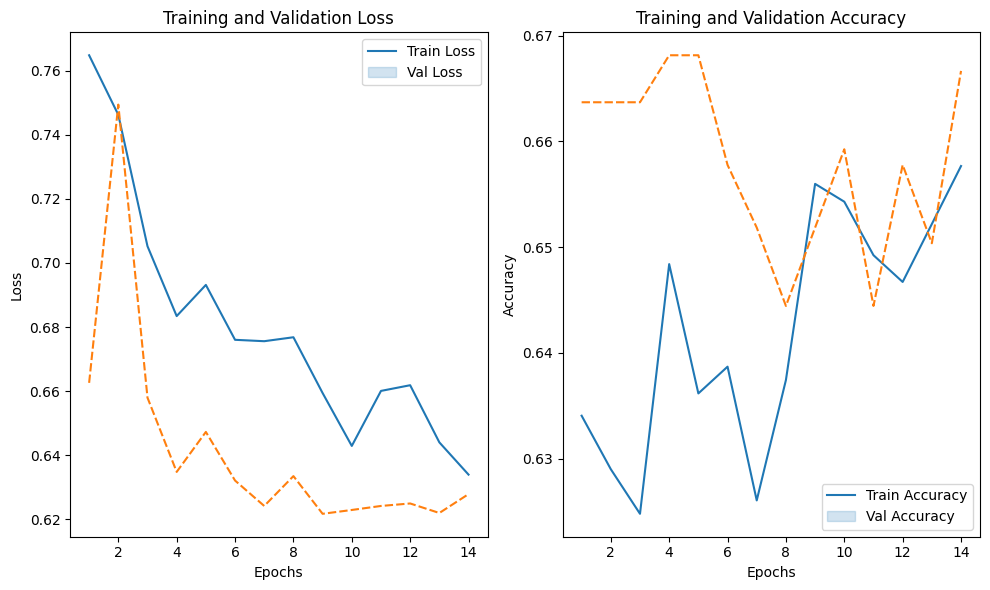

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

history = model.history.history

df_history = pd.DataFrame(history, index=range(1, 1 + len(history['loss'])))

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_history[['loss', 'val_loss']])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(labels=['Train Loss', 'Val Loss'])

plt.subplot(1, 2, 2)
sns.lineplot(data=df_history[['accuracy', 'val_accuracy']])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(labels=['Train Accuracy', 'Val Accuracy'])

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.96      0.75       208
           1       0.44      0.05      0.10       128

    accuracy                           0.61       336
   macro avg       0.53      0.51      0.43       336
weighted avg       0.55      0.61      0.50       336



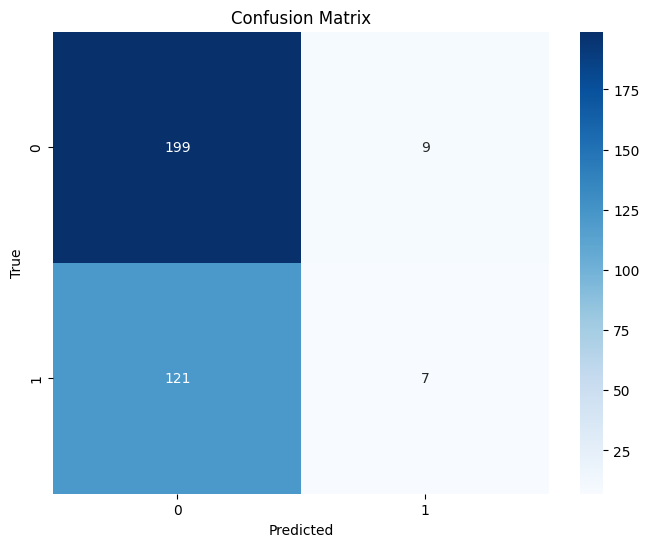

In [48]:
class_names = ["0", "1"]

evaluate_model(model, test_data, class_names)

In [50]:
model.save('breast.h5')